In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# help(np.random.randn)

In [4]:
N = 10
pos = np.random.randn(N,2) # random positions of nodes in 2D space
print(pos.shape)

(10, 2)


In [5]:
xpos = pos[:,0]
ypos = pos[:,1]

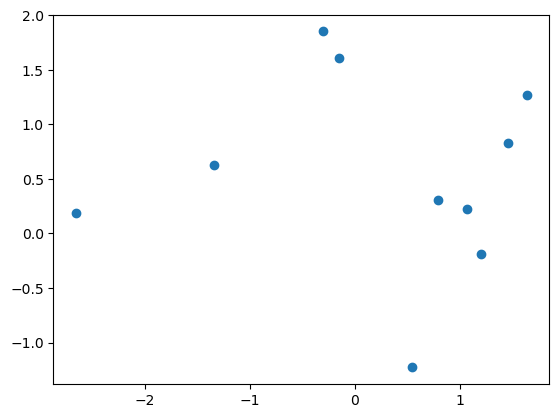

In [6]:
plt.scatter(xpos, ypos)
plt.show()

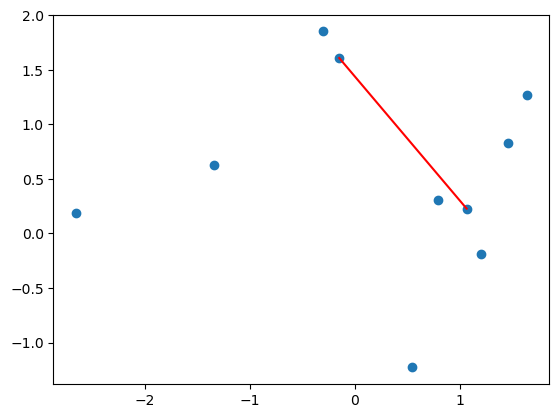

In [7]:
xedge = [xpos[0],xpos[1]]
yedge = [ypos[0],ypos[1]]
plt.scatter(xpos, ypos)

plt.plot(xedge,yedge,color='red')
plt.show()

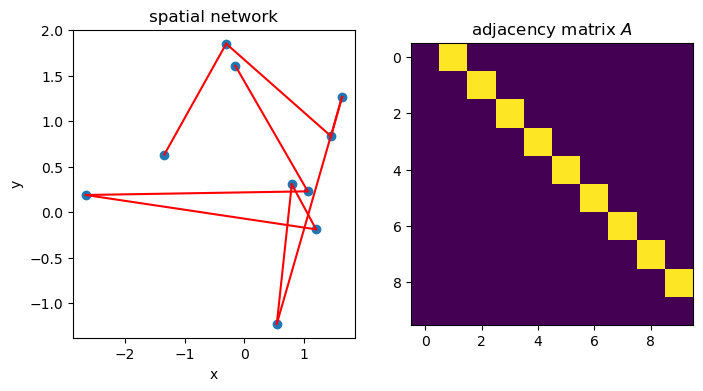

In [8]:
fig, ax = plt.subplots(1,2,figsize=(8,4))

A = np.zeros((N,N))

for i in range(N-1):
    pre_id = i
    post_id = i+1
    A[pre_id,post_id] = 1
    xedge = [xpos[pre_id],xpos[post_id]]
    yedge = [ypos[pre_id],ypos[post_id]]
    ax[0].plot(xedge, yedge,color='red')

ax[0].set_title('spatial network')
ax[0].scatter(xpos, ypos)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].imshow(A)
ax[1].set_title(r'adjacency matrix $A$')
plt.show()

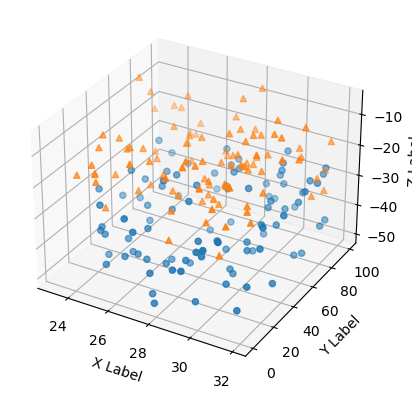

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [10]:
N = 10
pos = np.random.randn(N,3) # random positions of nodes in 3D space
# xpos, ypos, zpos = pos[0], pos[1], pos[2]
xpos = pos[:,0]
ypos = pos[:,1]
zpos = pos[:,2]

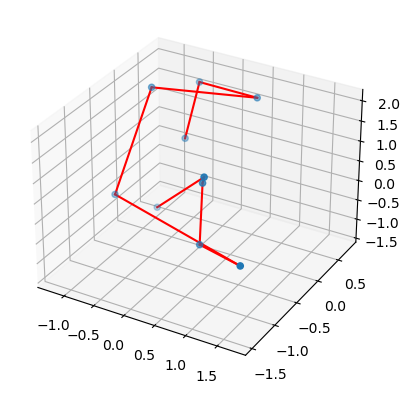

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in range(N-1):
    pre_id = i
    post_id = i+1
    A[pre_id,post_id] = 1
    xedge = [xpos[pre_id],xpos[post_id]]
    yedge = [ypos[pre_id],ypos[post_id]]
    zedge = [zpos[pre_id],zpos[post_id]]
    ax.plot(xedge, yedge, zedge, color='red')
    
ax.scatter(xpos, ypos, zpos)

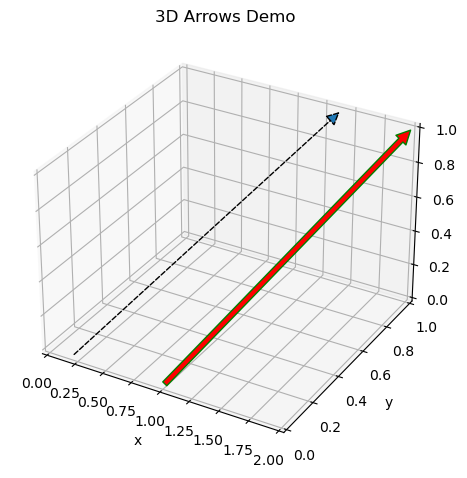

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D

class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)
        
    def do_3d_projection(self, renderer=None):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

        return np.min(zs)
    
def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)
    
setattr(Axes3D, 'arrow3D', _arrow3D)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(0,2)
ax.arrow3D(0.2,0,0,
           1.2,1,1,
           mutation_scale=20,
           arrowstyle="-|>",
           linestyle='dashed')
ax.arrow3D(1,0,0,
           1,1,1,
           mutation_scale=20,
           ec ='green',
           fc='red')
ax.set_title('3D Arrows Demo')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.tight_layout()

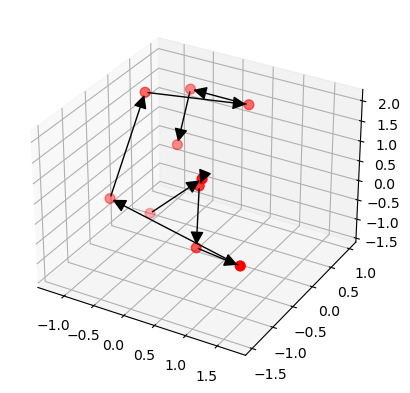

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in range(N-1):
    pre_id = i
    post_id = i+1
    A[pre_id,post_id] = 1
    # xedge = [xpos[pre_id],xpos[post_id]]
    x = xpos[pre_id]
    dx = xpos[post_id] - x
    # yedge = [ypos[pre_id],ypos[post_id]]
    y = ypos[pre_id]
    dy = ypos[post_id] - y
    # zedge = [zpos[pre_id],zpos[post_id]]
    z = zpos[pre_id]
    dz = zpos[post_id] - z
    ax.arrow3D(x , y , z ,
               dx, dy, dz,
               mutation_scale=20,
               arrowstyle="-|>",
               ec='black',
               fc='black')
    # ax.arrow(, yedge, zedge, color='red')
    # a = Arrow3D(xedge, yedge, 
    #             zedge, mutation_scale=20, 
    #             lw=3, arrowstyle="-|>", color="r")
    # ax.add_artist(a)
    
ax.scatter(xpos, ypos, zpos, s=50, color='red')

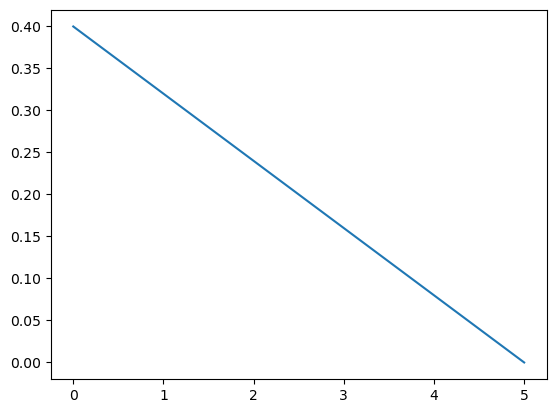

In [14]:
def linear_density(x0,x):
    ret = 0.
    if x < x0:
        ret = (2/x0)*(1-x/x0)
    return ret

x0 = 5
xvec = np.arange(0,5.1,0.1)
yvec = np.zeros(len(xvec))
for i in range(len(xvec)):
    x = xvec[i]
    yvec[i] = linear_density(x0,x)

plt.plot(xvec,yvec)

In [15]:
linear_density_vec = lambda x, x0: (x<x0)*(2/x0)*(1-x/x0)
x0 = 5
distvec = np.random.uniform(0,10,10)
print(len(distvec))
probs = linear_density_vec(distvec, x0)
print(probs)
print(probs>0)

10
[ 0.34739054  0.28945113 -0.          0.32512365 -0.          0.02316144
 -0.          0.11091774  0.13274597 -0.        ]
[ True  True False  True False  True False  True  True False]


In [16]:
pos = np.random.randn(N,2)
print(pos)
pos_others = np.delete(pos,4,axis=0)
print(pos_others)
pos_others - [1,1]

[[ 0.18906606  1.26560608]
 [-0.49780957 -0.37958692]
 [-0.69850245  0.58795293]
 [ 0.13963546 -0.29788478]
 [ 0.74746283  0.35887092]
 [ 1.03765535  0.96289682]
 [ 0.46208382  1.62516027]
 [ 0.63313809 -1.35179051]
 [ 1.00153221  0.31967501]
 [ 0.56616193  0.76477199]]
[[ 0.18906606  1.26560608]
 [-0.49780957 -0.37958692]
 [-0.69850245  0.58795293]
 [ 0.13963546 -0.29788478]
 [ 1.03765535  0.96289682]
 [ 0.46208382  1.62516027]
 [ 0.63313809 -1.35179051]
 [ 1.00153221  0.31967501]
 [ 0.56616193  0.76477199]]


array([[-8.10933941e-01,  2.65606079e-01],
       [-1.49780957e+00, -1.37958692e+00],
       [-1.69850245e+00, -4.12047073e-01],
       [-8.60364536e-01, -1.29788478e+00],
       [ 3.76553483e-02, -3.71031797e-02],
       [-5.37916175e-01,  6.25160265e-01],
       [-3.66861913e-01, -2.35179051e+00],
       [ 1.53220926e-03, -6.80324991e-01],
       [-4.33838072e-01, -2.35228014e-01]])

In [17]:
def getDists2D(pos, refidx):
    pos_ref = pos[refidx,:]
    pos_others = np.delete(pos, refidx, axis=0)
    x_ref = pos_ref[0]
    y_ref = pos_ref[1]
    x_others = pos_others[:,0]
    y_others = pos_others[:,1]
    dists = (x_ref - x_others)**2 + (y_ref - y_others)**2
    dists = np.sqrt(dists)
    return dists

In [18]:
N = 5
pos = np.random.randn(N,2) # random positions of nodes in 2D space
refidx = 3
dists = getDists2D(pos, refidx)
print(dists)
x0 = 0.5
probs = linear_density_vec(dists, x0)
print(probs)
conns = np.array(probs>0, dtype=int)
print(conns)

[0.57553792 1.06856324 1.0528659  1.44342349]
[-0. -0. -0. -0.]
[0 0 0 0]


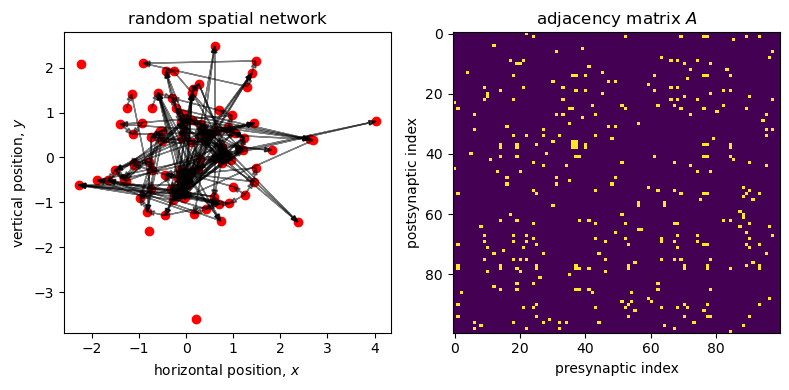

In [19]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
N = 100
pos = np.random.randn(N,2) # random positions of nodes in 2D space
xpos = pos[:,0]
ypos = pos[:,1]
ax[0].scatter(xpos, ypos, color = 'red')
x0 = 0.4

A = np.zeros((N,N))

for refidx in range(N):
    dists = getDists2D(pos, refidx)
    probs = linear_density_vec(dists, x0)
    # conns = np.array(probs>0, dtype=int)
    p = np.random.rand()
    conn_idcs = np.argwhere(probs>p)
    for conn_idx in conn_idcs:
        post_idx = conn_idx[0]
        A[refidx,post_idx] = 1
        xedge = [xpos[refidx],xpos[post_idx]]
        yedge = [ypos[refidx],ypos[post_idx]]
        xpre = xpos[refidx]
        xpost= xpos[post_idx]
        dx = xpost - xpre
        ypre = ypos[refidx]
        ypost= ypos[post_idx]
        dy = ypost - ypre        
        
        # print(xedge)
        # ax[0].plot(xedge, yedge,color='red')
        ax[0].arrow(xpre, ypre, dx, dy, head_width=0.1, fc='black',alpha = 0.5, length_includes_head=True)
    # print(A)
    # pre_id = i
    # post_id = i+1
    # A[pre_id,post_id] = 1
    # xedge = [xpos[pre_id],xpos[post_id]]
    # yedge = [ypos[pre_id],ypos[post_id]]
    # ax[0].plot(xedge, yedge,color='red')

ax[0].set_title('random spatial network')
# ax[0].scatter(xpos, ypos)
# ax[0].set_xlim([-3,3])
# ax[0].set_ylim([-3,3])
ax[0].set_xlabel(r'horizontal position, $x$')
ax[0].set_ylabel(r'vertical position, $y$')
ax[1].imshow(A,aspect="auto")
ax[1].set_xlabel('presynaptic index')
ax[1].set_ylabel('postsynaptic index')
ax[1].set_title(r'adjacency matrix $A$')
plt.tight_layout()
plt.savefig('2D_spatial_net.png',bbox_inches='tight',dpi=200)
plt.show()

In [20]:
def getDists3D(pos, refidx):
    pos_ref = pos[refidx,:]
    pos_others = np.delete(pos, refidx, axis=0)
    x_ref = pos_ref[0]
    y_ref = pos_ref[1]
    z_ref = pos_ref[2]
    x_others = pos_others[:,0]
    y_others = pos_others[:,1]
    z_others = pos_others[:,2]
    dists = (x_ref - x_others)**2 + (y_ref - y_others)**2 + (z_ref - z_others)**2
    dists = np.sqrt(dists)
    return dists

/tmp/ipykernel_47/3915796689.py:37: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 13


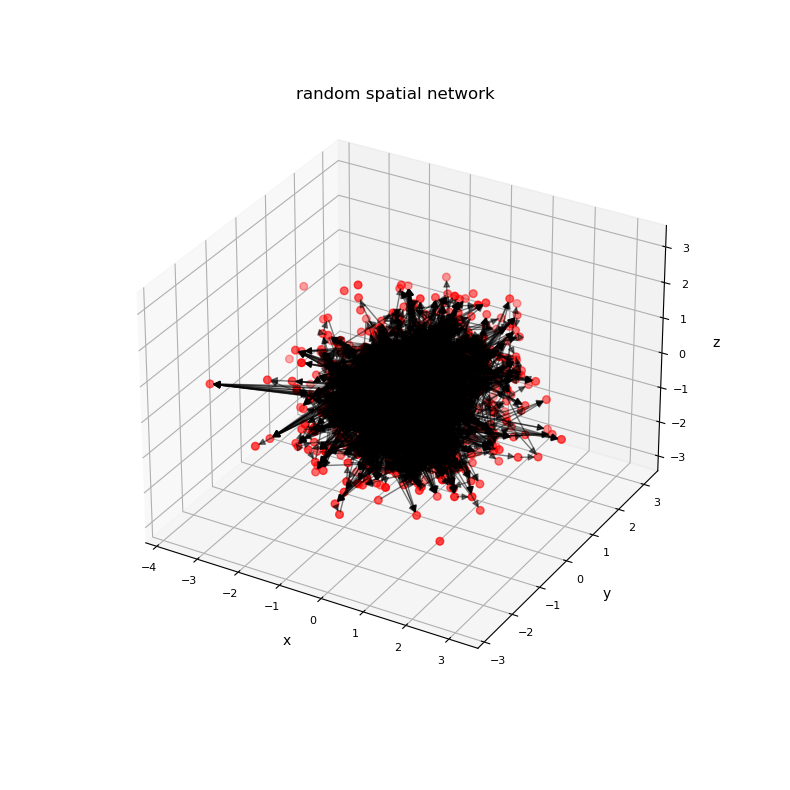

In [21]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

N = 1000
pos = np.random.randn(N,3) # random positions of nodes in 3D space
xpos = pos[:,0]
ypos = pos[:,1]
zpos = pos[:,2]
ax.scatter(xpos, ypos, zpos, color = 'red', s = 30)
x0 = 0.5
A = np.zeros((N,N))
for refidx in range(N):
    dists = getDists3D(pos, refidx)
    probs = linear_density_vec(dists, x0)
    # conns = np.array(probs>0, dtype=int)
    p = np.random.rand()
    conn_idcs = np.argwhere(probs>p)
    for conn_idx in conn_idcs:
        post_idx = conn_idx[0]
        A[refidx,post_idx] = 1
        xpre = xpos[refidx]
        xpost= xpos[post_idx]
        dx = xpost - xpre
        ypre = ypos[refidx]
        ypost= ypos[post_idx]
        dy = ypost - ypre        
        zpre = zpos[refidx]
        zpost= zpos[post_idx]
        dz = zpost - zpre
        ax.arrow3D(xpre, ypre, zpre,
                   dx  , dy  , dz  ,
                   mutation_scale=10,
                   arrowstyle="-|>",
                   ec='black',
                   fc='black',
                   alpha=0.5)
ax.dist = 13
plt.rcParams['axes.titley'] = 0.95
ax.set_title(f'random spatial network')
ax.set_xlabel(r'x',labelpad=10)
ax.tick_params(axis='x',labelsize=8)
ax.set_ylabel(r'y',labelpad=10)
ax.tick_params(axis='y',labelsize=8)
ax.set_zlabel(r'z',labelpad=10)
ax.tick_params(axis='z',labelsize=8)
plt.savefig('3d_spatialNet.png',bbox_inches='tight',dpi=200)
plt.show()
# ax.scatter(xpos, ypos, zpos, s=50, color='red')

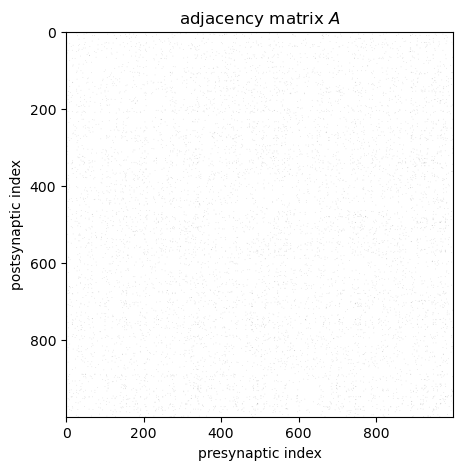

In [22]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(A,aspect="auto",cmap='Greys')
plt.rcParams['axes.titley'] = 1
ax.set_xlabel('presynaptic index')
ax.set_ylabel('postsynaptic index')
ax.set_title(r'adjacency matrix $A$')
plt.savefig('A_3d_spatial.png',bbox_inches='tight',dpi=200)
plt.show()

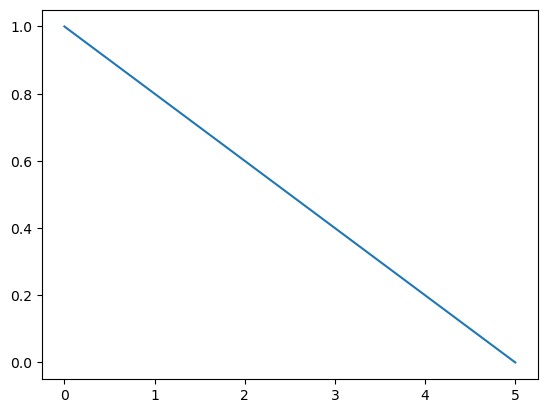

In [23]:
def linear_cdf(x0,x):
    ret = 0.
    if x < x0:
        ret = 1 - x/x0
    return ret

x0 = 5
xvec = np.arange(0,5.1,0.1)
yvec = np.zeros(len(xvec))
for i in range(len(xvec)):
    x = xvec[i]
    yvec[i] = linear_cdf(x0,x)

plt.plot(xvec,yvec)

In [24]:
linear_cdf_vec = lambda x, x0: (x<x0)*(1 - x/x0)

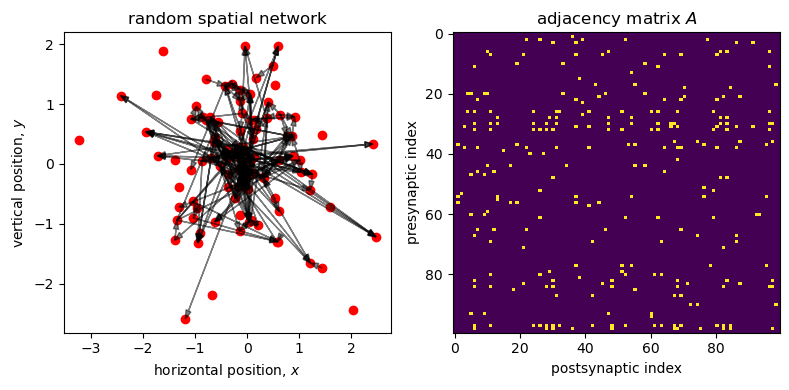

In [27]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
N = 100
pos = np.random.randn(N,2) # random positions of nodes in 2D space
xpos = pos[:,0]
ypos = pos[:,1]
ax[0].scatter(xpos, ypos, color = 'red')
x0 = 0.5

A = np.zeros((N,N))

for refidx in range(N):
    dists = getDists2D(pos, refidx)
    probs = linear_cdf_vec(dists, x0)
    # conns = np.array(probs>0, dtype=int)
    p = np.random.rand()
    conn_idcs = np.argwhere(probs>p)
    for conn_idx in conn_idcs:
        post_idx = conn_idx[0]
        A[refidx,post_idx] = 1
        xedge = [xpos[refidx],xpos[post_idx]]
        yedge = [ypos[refidx],ypos[post_idx]]
        xpre = xpos[refidx]
        xpost= xpos[post_idx]
        dx = xpost - xpre
        ypre = ypos[refidx]
        ypost= ypos[post_idx]
        dy = ypost - ypre        
        
        # print(xedge)
        # ax[0].plot(xedge, yedge,color='red')
        ax[0].arrow(xpre, ypre, dx, dy, head_width=0.1, fc='black',alpha = 0.5, length_includes_head=True)

ax[0].set_title('random spatial network')
# ax[0].scatter(xpos, ypos)
# ax[0].set_xlim([-3,3])
# ax[0].set_ylim([-3,3])
ax[0].set_xlabel(r'horizontal position, $x$')
ax[0].set_ylabel(r'vertical position, $y$')
ax[1].imshow(A,aspect="auto")
ax[1].set_ylabel('presynaptic index')
ax[1].set_xlabel('postsynaptic index')
ax[1].set_title(r'adjacency matrix $A$')
plt.tight_layout()
plt.savefig('2D_spatial_net.png',bbox_inches='tight',dpi=200)
plt.show()

/tmp/ipykernel_47/561765506.py:37: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 13


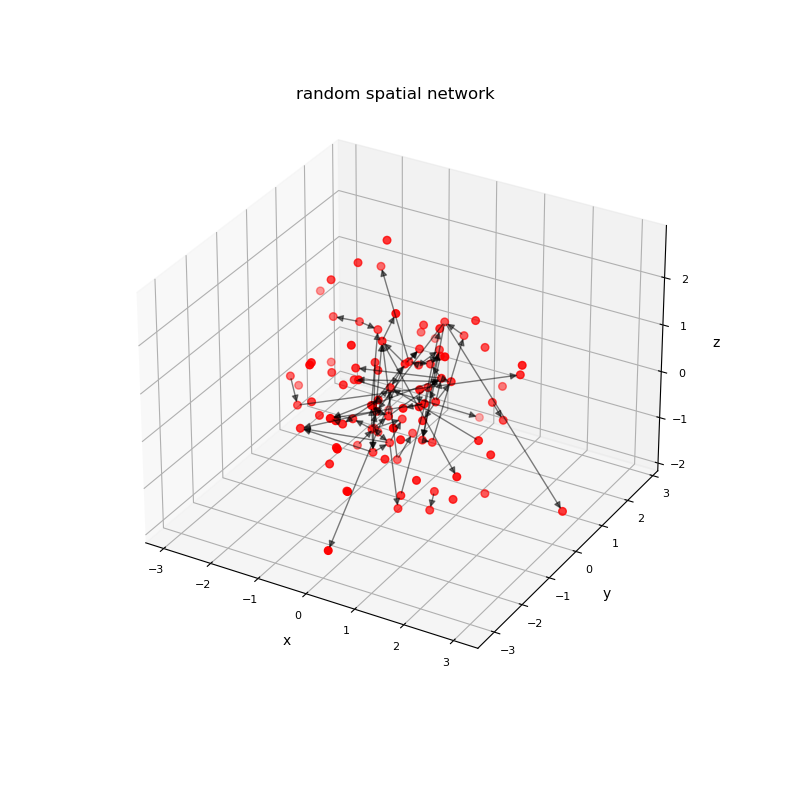

In [29]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

N = 100
pos = np.random.randn(N,3) # random positions of nodes in 3D space
xpos = pos[:,0]
ypos = pos[:,1]
zpos = pos[:,2]
ax.scatter(xpos, ypos, zpos, color = 'red', s = 30)
x0 = 0.7
A = np.zeros((N,N))
for refidx in range(N):
    dists = getDists3D(pos, refidx)
    probs = linear_cdf_vec(dists, x0)
    # conns = np.array(probs>0, dtype=int)
    p = np.random.rand()
    conn_idcs = np.argwhere(probs>p)
    for conn_idx in conn_idcs:
        post_idx = conn_idx[0]
        A[refidx,post_idx] = 1
        xpre = xpos[refidx]
        xpost= xpos[post_idx]
        dx = xpost - xpre
        ypre = ypos[refidx]
        ypost= ypos[post_idx]
        dy = ypost - ypre        
        zpre = zpos[refidx]
        zpost= zpos[post_idx]
        dz = zpost - zpre
        ax.arrow3D(xpre, ypre, zpre,
                   dx  , dy  , dz  ,
                   mutation_scale=10,
                   arrowstyle="-|>",
                   ec='black',
                   fc='black',
                   alpha=0.5)
ax.dist = 13
plt.rcParams['axes.titley'] = 0.95
ax.set_title(f'random spatial network')
ax.set_xlabel(r'x',labelpad=10)
ax.tick_params(axis='x',labelsize=8)
ax.set_ylabel(r'y',labelpad=10)
ax.tick_params(axis='y',labelsize=8)
ax.set_zlabel(r'z',labelpad=10)
ax.tick_params(axis='z',labelsize=8)
plt.savefig('3d_spatialNet.png',bbox_inches='tight',dpi=200)
plt.show()
# ax.scatter(xpos, ypos, zpos, s=50, color='red')

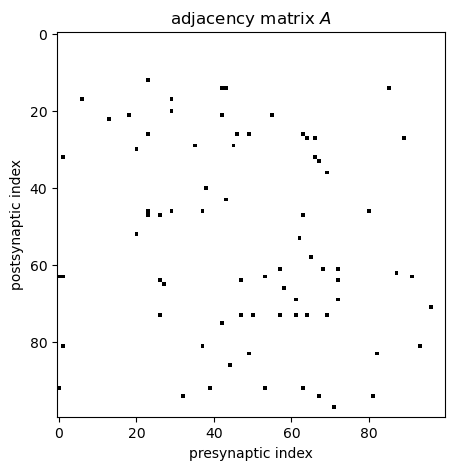

In [30]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(A,aspect="auto",cmap='Greys')
plt.rcParams['axes.titley'] = 1
ax.set_xlabel('presynaptic index')
ax.set_ylabel('postsynaptic index')
ax.set_title(r'adjacency matrix $A$')
plt.savefig('A_3d_spatial.png',bbox_inches='tight',dpi=200)
plt.show()

In [32]:
!pip3 install dotmotif

  Obtaining dependency information for dotmotif from https://files.pythonhosted.org/packages/d2/ae/7d722361a404ceb71041af906500c2bab4c3fee2a557f98f3c143742ffd4/dotmotif-0.14.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 13.1 MB/s eta 0:00:00
  Created wheel for grandiso: filename=grandiso-2.1.1-py3-none-any.whl size=15140 sha256=a9d26aec8d5ee2703a4c4904f4ad100ea6dee04b57ffddc4b07596d3c2fcc898
  Stored in directory: /root/.cache/pip/wheels/b9/1c/80/ab6ac6edf56f126ebeb8ed8825f031aa7d10711ac653a393c6
Successfully built grandiso
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.8
    Uninstalling networkx-2.8.8:
      Successfully uninstalled networkx-2.8.8
ERROR: pip's dependency resolver does not currently take into ac

In [38]:
import networkx as nx
from dotmotif import Motif, GrandIsoExecutor

In [51]:
hostA = nx.from_numpy_array(A,create_using=nx.DiGraph)

In [52]:
print(type(hostA))

<class 'networkx.classes.digraph.DiGraph'>


In [60]:
executor = GrandIsoExecutor(graph=hostA)

In [61]:
con_motif = Motif("""
A -> C
B -> C
""")

In [66]:
con_results = executor.find(con_motif)

In [68]:
# con_results

In [65]:
len(con_results)

72